## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [766]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score


In [767]:
ls

Iris.csv
R3_External_Lab_Logistic_and_Naive_bayes_questions.ipynb
students-data.csv


In [768]:
student_df = pd.read_csv('students-data.csv',sep=';')
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [769]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [770]:
student_df.isnull().sum().sum() #check missing values

0

There are no missing values

In [771]:
#Set the index name of the dataframe to "number"
student_df.rename_axis('number',inplace=True)
student_df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [772]:
student_df.select_dtypes(exclude='int64').columns #column names with non-numeric values

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [773]:
integer_cols = student_df.select_dtypes(include='int64').columns
student_df.var() #check the variance of each column

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [774]:
#print col names with variance less than 1
cols_to_drop = []
for col in integer_cols:
    if student_df.loc[:,col].var() < 1:
        print(col)
        cols_to_drop.append(col)

traveltime
studytime
failures
famrel
freetime
Dalc


In [775]:
#drop columns with variance less than 1
student_df.drop(columns=cols_to_drop,inplace=True)
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [776]:
student_df.select_dtypes(exclude='int64').describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [777]:
categorical_cols = student_df.select_dtypes(exclude='int64').columns
categorical_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [778]:
student_df.head() #before encoding

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [779]:
label_enco = LabelEncoder()
for cat_col in categorical_cols:
    student_df[cat_col] = label_enco.fit_transform(student_df[cat_col])

In [780]:
student_df.head() #after encoding

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [781]:
student_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,2.169620,1.227473,0.0,2.0,2.0,3.0,4.0
Fjob,395.0,2.281013,0.863542,0.0,2.0,2.0,3.0,4.0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [782]:
student_df['G1'].head(20)

number
0      5
1      5
2      7
3     15
4      6
5     15
6     12
7      6
8     16
9     14
10    10
11    10
12    14
13    10
14    14
15    14
16    13
17     8
18     6
19     8
Name: G1, dtype: int64

In [783]:
grade_cols = ['G1','G2','G3']
for grade_col in grade_cols:
    student_df[grade_col+ '_binary'] = student_df[grade_col].apply(lambda x: 1 if x>=10 else 0)

In [784]:
student_df['G1_binary'].head(20)

number
0     0
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    0
Name: G1_binary, dtype: int64

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [785]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'G1_binary',
       'G2_binary', 'G3_binary'],
      dtype='object')

In [786]:
array = student_df.values
X = array[:,:-4] #Upto G2
y = array[:,-1:] #only G3_binary

In [787]:
array

array([[ 0,  0, 18, ...,  0,  0,  0],
       [ 0,  0, 17, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  1],
       ...,
       [ 1,  1, 21, ...,  1,  0,  0],
       [ 1,  1, 18, ...,  1,  1,  1],
       [ 1,  1, 19, ...,  0,  0,  0]])

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

Text(0,0.5,'G3_binary')

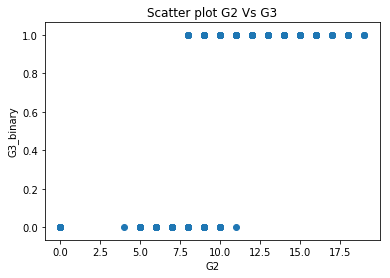

In [788]:
plt.scatter(student_df['G2'],student_df['G3_binary'])
plt.title('Scatter plot G2 Vs G3')
plt.xlabel('G2')
plt.ylabel('G3_binary')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


The graph shows a sigmoid function 

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [789]:
schools = student_df['school'].unique().tolist()
school1 = 0 #GP
school2 = 1 #MS
gp_students = student_df[student_df['school']== school1]['school'].count()
ms_students = student_df[student_df['school']== school2]['school'].count()
print('GP: {}, MS: {}'.format(gp_students,ms_students))

GP: 349, MS: 46


Text(0,0.5,'Total Students')

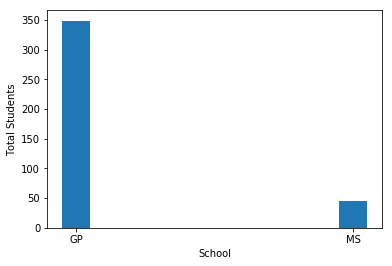

In [790]:
x = np.arange(student_df['school'].nunique())
width=0.1
plt.bar(x,[gp_students,ms_students],width=width)
plt.xticks(x,['GP','MS'])
plt.xlabel('School')
plt.ylabel('Total Students')



Text(0.5,1,'Number of Students in each age group')

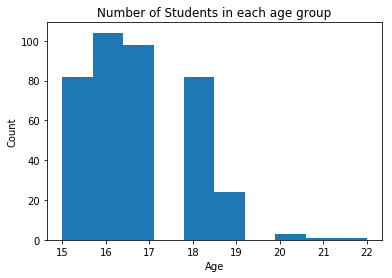

In [791]:
plt.hist(student_df['age'],bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Students in each age group')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [792]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [793]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
model_score_f1 = f1_score(y_test,y_predict)
accuracy = accuracy_score(y_test,y_predict)
print('model score: {}'.format(model_score))
print('f1 score: {}'.format(model_score_f1))
print('accuracy: {}'.format(accuracy))

model score: 0.907563025210084
f1 score: 0.9385474860335197
accuracy: 0.907563025210084


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive bayes with Iris data

### Import Iris.csv

In [794]:
ls

Iris.csv
R3_External_Lab_Logistic_and_Naive_bayes_questions.ipynb
students-data.csv


In [795]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [803]:
array = iris_df.values
X = array[:,:-1] #independent variables
y = array[:,-1:] #dependent variable (Class)

### Find the distribution of target variable (Class)

In [796]:
pd.value_counts(iris_df["Class"])

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

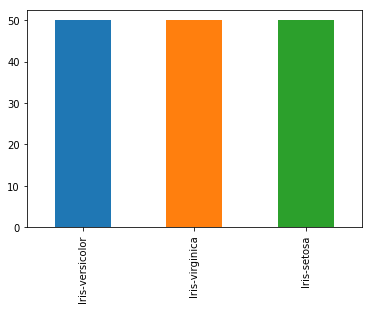

In [797]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

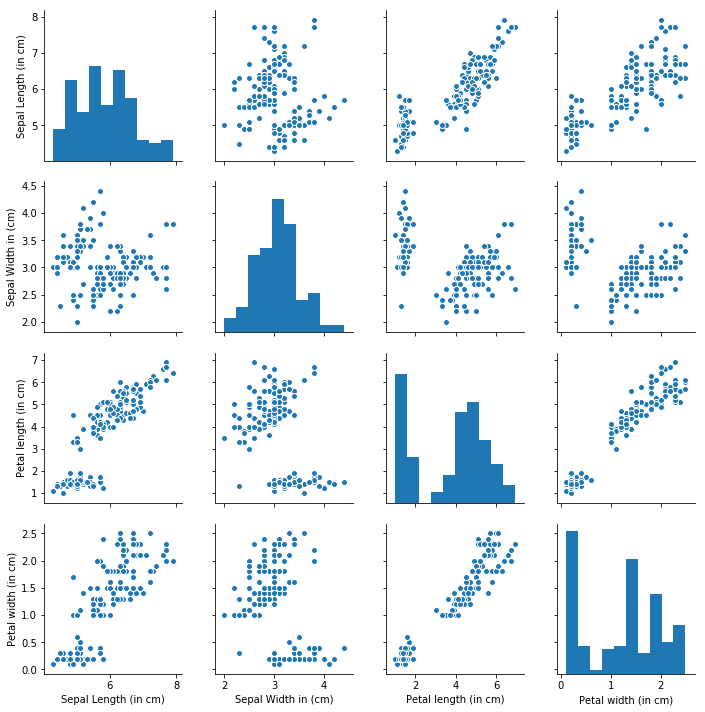

In [798]:
sns.pairplot(iris_df)

Observations:
Sepal width is normally distributed.
Petal length & petal width seem to have the strongest correlation compared to other parameters.
Petal width & Sepal length have positive correlation as well.

### Summary Statistics and explain insights for at least 2 variables

In [799]:
iris_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
Sepal Width in (cm),150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
Petal length (in cm),150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
Petal width (in cm),150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Class,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As observed the in the pairplot, sepal width has comparable mean and median. Petal length has the highest standard deviation compared to other params. Mean & median of sepal length are also pretty close. However, from the paiplot, it has multiple peaks hence cannot be considered as normal distribution

### Correlation among all variables and give your insights

In [800]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


As expected, petal width & petal length have the highest correlation followed by petal length Vs sepal length. Sepal width Vs sepal length have the worst correlation.

### Split data in Training and Validation in 80:20

In [804]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [805]:
model = GaussianNB()
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [806]:
# make predictions
y_predict = model.predict(X_test)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [810]:
accuracy = accuracy_score(y_test,y_predict)
print('accuracy: {}'.format(accuracy))


accuracy: 0.8333333333333334


In [812]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30

[[7 0 0]
 [0 9 3]
 [0 2 9]]


Overall accuracy of the model is roughly 83% (5 out of 30 were mispredicted) with 100% accuracy for Iris-setosa prediction.
For Iris-versicolor, 9 out of 12 were predcited correctly whereas for Iris-virginica, 9 out of 11 were predicted correctly.